# Introduction

Single particle tracking (SPT) analysis involves many steps. This notebook assumes that the tracking has already been performed on a set of images with *TrackMate*. We start from a set of CSV files that contain at least X and Y positions and a trajectory label. The idea will be to turn these trajectories into mean square displacement curves (MSDs) and extract all of the features of interest which will be stored in list that can be turned into a DataFrame. 

In [1]:
#!pip install pandas seaborn scikit-learn lmfit mahotas imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions.functions import TE_MSD,Michalet,set_size,pool_data
from sklearn.cluster import KMeans
import matplotlib as mpl
import seaborn as sns
import random

%matplotlib inline
%reload_ext autoreload

# Experimental condition
dt = 0.05

# Initial filtering
minframe=10
maxframe=40
rsquared_threshold=-1000

# Process raw data

The raw data is a list of CSV files. The `data_pool` function processes these CSVs and returns a list of observations that can readily be turned into a `DataFrame`. 

    DATA = data_pool(list of CSV files,
    time step for the experiment dt,
    minimum number of frames for the trajectories,
    maximum number of frames for the trajectories,
    minimum value for the quality of the MSD fit R**2,
    fit_option = number of points for the fit of the MSD,
    images = set of images in order to compute the cell's mean intensity)


In [2]:
files1 = ["Data/SM1/tracks135.csv","Data/SM2/tracks135.csv","Data/SM3/tracks135.csv","Data/SM4/tracks135.csv","Data/SM5/tracks135.csv","Data/SM6/tracks135.csv","Data/SM7/tracks135.csv","Data/SM8/tracks135.csv","Data/SM9/tracks135.csv","Data/SM10/tracks135.csv","Data/SM11/tracks135.csv","Data/SM12/tracks135.csv","Data/SM13/tracks135.csv"]
files2 = ["Data/SM1_WNT/tracks135.csv","Data/SM2_WNT/tracks135.csv","Data/SM3_WNT/tracks135.csv","Data/SM4_WNT/tracks135.csv","Data/SM5_WNT/tracks135.csv","Data/SM6_WNT/tracks135.csv","Data/SM7_WNT/tracks135.csv","Data/SM8_WNT/tracks135.csv","Data/SM10_WNT/tracks135.csv","Data/SM11_WNT/tracks135.csv","Data/SM12_WNT/tracks135.csv"]
files3 = ["Data/SM1_INI/tracks135.csv","Data/SM2_INI/tracks135.csv","Data/SM3_INI/tracks135.csv","Data/SM4_INI/tracks135.csv","Data/SM5_INI/tracks135.csv","Data/SM6_INI/tracks135.csv","Data/SM8_INI/tracks135.csv","Data/SM9_INI/tracks135.csv","Data/SM11_INI/tracks135.csv","Data/SM12_INI/tracks135.csv","Data/SM13_INI/tracks135.csv","Data/SM14_INI/tracks135.csv"]
#files1 = ["Data/SM1/tracks425.csv","Data/SM2/tracks425.csv","Data/SM3/tracks425.csv","Data/SM4/tracks425.csv","Data/SM5/tracks425.csv","Data/SM6/tracks425.csv","Data/SM7/tracks425.csv","Data/SM8/tracks425.csv","Data/SM9/tracks425.csv","Data/SM10/tracks425.csv"]
#files2 = ["Data/SM1_WNT/tracks425.csv","Data/SM2_WNT/tracks425.csv","Data/SM3_WNT/tracks425.csv","Data/SM4_WNT/tracks425.csv","Data/SM5_WNT/tracks425.csv","Data/SM6_WNT/tracks425.csv","Data/SM7_WNT/tracks425.csv","Data/SM8_WNT/tracks425.csv","Data/SM10_WNT/tracks425.csv"]

DATA1_135 = pool_data(files1,dt,minframe,maxframe,rsquared_threshold,fit_option=5)
DATA2_135 = pool_data(files2,dt,minframe,maxframe,rsquared_threshold,fit_option=5)
DATA3_135 = pool_data(files3,dt,minframe,maxframe,rsquared_threshold,fit_option=5)

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  10 , maxframe =  40 , R2 threshold =  -1000
Fit option:  5
Reading filenames in  ['Data/SM1/tracks135.csv', 'Data/SM2/tracks135.csv', 'Data/SM3/tracks135.csv', 'Data/SM4/tracks135.csv', 'Data/SM5/tracks135.csv', 'Data/SM6/tracks135.csv', 'Data/SM7/tracks135.csv', 'Data/SM8/tracks135.csv', 'Data/SM9/tracks135.csv', 'Data/SM10/tracks135.csv', 'Data/SM11/tracks135.csv', 'Data/SM12/tracks135.csv', 'Data/SM13/tracks135.csv'] ...
Analysis for Data/SM1/tracks135.csv ...
92  tracks were kept out of  5305 . Done.
Analysis for Data/SM2/tracks135.csv ...
456  tracks were kept out of  31804 . Done.
Analysis for Data/SM3/tracks135.csv ...
266  tracks were kept out of  14417 . Done.
Analysis for Data/SM4/tracks135.csv ...
183  tracks were kept out of  8871 . Done.
Analysis for Data/SM5/tracks135.csv ...
30  tracks were kept out of  2558 . Done.
Analysis for Data/SM6/tracks135.csv ...
201  tracks were kept out of  12231 . Done.


# Prepare DataFrames

The DATA-list contains either 9 or 10 features (if a set of images was provided). It is a list of $N_T$ observations and each observation is a set of 9-10 features. 

$$
\begin{pmatrix}
[ \alpha_1 & D_1 & c_1 & N_1 & \text{ID}_1 & X_1 & Y_1 & \text{MSD}_1 & \text{FILE}_1 & I_1 ]\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
[\alpha_{N_T} & D_{N_T} & c_{N_T} & N_{N_T} & \text{ID}_{N_T} & X_{N_T} & Y_{N_T} & \text{MSD}_{N_T} & \text{FILE}_{N_T} & I_{N_T}] \\
\end{pmatrix}
$$

Such an object can be readily turned into a dataframe with `pandas`. 

# Here change `minframe` and $R^2$ for the datasets at 135 nm

In [3]:
display(DATA1_135.describe())
display(DATA2_135.describe())
display(DATA3_135.describe())
samp1 = DATA1_135[(DATA1_135['R2']>0.5)]
samp1.reset_index()
samp2 = DATA2_135[(DATA2_135['R2']>0.5)]
samp2.reset_index()
samp3 = DATA3_135[(DATA3_135['R2']>0.5)]
samp3.reset_index()

,alpha,D,c,R2,N
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000
mean,0.224860,-2.644745,0.125411,-0.280133,15.310279
std,0.194131,0.317085,0.087824,1.440243,6.289185
min,0.100000,-3.856050,0.000000,-26.765874,10.000000
25%,0.100000,-2.837935,0.061140,-0.370082,11.000000
50%,0.118409,-2.687783,0.104659,-0.039069,13.000000
75%,0.288413,-2.503707,0.170922,0.284760,18.000000
max,1.484002,-0.950850,1.000000,0.995459,40.000000


,alpha,D,c,R2,N
count,664.000000,664.000000,664.000000,664.000000,664.000000
mean,0.217240,-2.729334,0.123313,-0.307928,15.219880
std,0.199980,0.351053,0.084458,1.563064,6.428854
min,0.100000,-3.634133,0.001069,-24.017615,10.000000
25%,0.100000,-2.946145,0.059625,-0.352925,11.000000
50%,0.100000,-2.785016,0.108800,-0.051090,13.000000
75%,0.274498,-2.577340,0.164761,0.289049,18.000000
max,1.336326,-1.059028,0.479958,0.999316,40.000000


,alpha,D,c,R2,N
count,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.268975,-2.586073,0.138518,-0.131502,14.605682
std,0.236276,0.366811,0.096250,1.148635,6.065454
min,0.100000,-3.610405,0.007772,-11.774858,10.000000
25%,0.100000,-2.827049,0.068003,-0.289387,10.000000
50%,0.160758,-2.668506,0.117260,0.008115,12.000000
75%,0.358150,-2.412010,0.183842,0.444863,16.000000
max,1.440625,-0.785501,0.676604,0.996943,40.000000


,index,alpha,D,c,R2,N,x,y,MSD,Filename,spotIDs
0,1,0.842989,-1.899716,0.423857,0.801625,10,"[47.123999999999995, 47.153999999999996, 47.22...","[19.299, 19.269000000000002, 19.365, 19.366, 1...","[0.004320222222222457, 0.007701000000000515, 0...",Data/SM1_INI/tracks135.csv,"[150550, 151849, 155770, 157035, 158307, 15964..."
1,4,0.583570,-2.207949,0.233381,0.954245,10,"[56.761, 56.833, 56.766999999999996, 56.708, 5...","[38.580999999999996, 38.556999999999995, 38.57...","[0.00433411111111086, 0.006820374999999739, 0....",Data/SM1_INI/tracks135.csv,"[180948, 184878, 183566, 186129, 187490, 18873..."
2,11,0.336108,-2.460187,0.144662,0.646272,11,"[58.46, 58.408, 58.375, 58.356, 58.407, 58.433...","[43.176, 43.208999999999996, 43.227, 43.28, 43...","[0.004631399999999633, 0.007248222222222087, 0...",Data/SM1_INI/tracks135.csv,"[308030, 304348, 306800, 305588, 309301, 31174..."
3,13,0.270986,-2.609380,0.089573,0.672397,16,"[60.053000000000004, 60.093999999999994, 60.04...","[6.882999999999999, 6.939, 6.99, 6.983, 7.044,...","[0.004663800000000143, 0.004608999999999941, 0...",Data/SM1_INI/tracks135.csv,"[314639, 316972, 313451, 315800, 318213, 32060..."
4,14,0.371496,-2.479818,0.117661,0.613661,10,"[30.066, 30.064, 30.08, 30.119, 30.002, 30.05,...","[6.737, 6.729, 6.747999999999999, 6.78, 6.784,...","[0.005000666666666731, 0.004282874999999966, 0...",Data/SM1_INI/tracks135.csv,"[320601, 319406, 325549, 321873, 323312, 32310..."
...,...,...,...,...,...,...,...,...,...,...,...
197,861,0.219144,-2.753316,0.251958,0.782930,10,"[62.148, 62.093999999999994, 62.175, 62.148999...","[51.166000000000004, 51.108000000000004, 51.12...","[0.003525111111111346, 0.0047053750000002215, ...",Data/SM14_INI/tracks135.csv,"[6948513, 6950112, 6951777, 6956460, 6953476, ..."
198,864,0.473403,-2.242025,0.314301,0.648567,10,"[59.408, 59.31100000000001, 59.181000000000004...","[52.34, 52.324, 52.331, 52.321000000000005, 52...","[0.005376777777777537, 0.008877374999999799, 0...",Data/SM14_INI/tracks135.csv,"[6999939, 7008314, 7006668, 7009929, 7016470, ..."
199,869,0.458457,-2.350581,0.188765,0.879621,15,"[56.997, 56.956, 56.971000000000004, 57.006, 5...","[6.141, 6.115, 6.153, 6.06, 6.105, 6.172999999...","[0.004940357142857167, 0.005869692307692259, 0...",Data/SM14_INI/tracks135.csv,"[7085250, 7086908, 7088543, 7093441, 7090186, ..."
200,874,0.572325,-2.273584,0.240572,0.897317,11,"[62.902, 62.891999999999996, 62.85899999999999...","[50.464, 50.483999999999995, 50.543, 50.493, 5...","[0.0037873999999998745, 0.005985222222222454, ...",Data/SM14_INI/tracks135.csv,"[7279093, 7285556, 7282361, 7280763, 7287164, ..."


In [ ]:
#remove1 = [59,90,102,145,182,195,213,227,233,283,290,320,323]
#samp1 = samp1.drop(samp1.index[remove1])

#remove2 = [6,9,10,29,48,61,62,63,69,93,96]
#samp2 = samp2.drop(samp2.index[remove2])

#remove3 = [6,9,10,29,48,61,62,63,69,93,96]
#samp3 = samp3.drop(samp3.index[remove3])

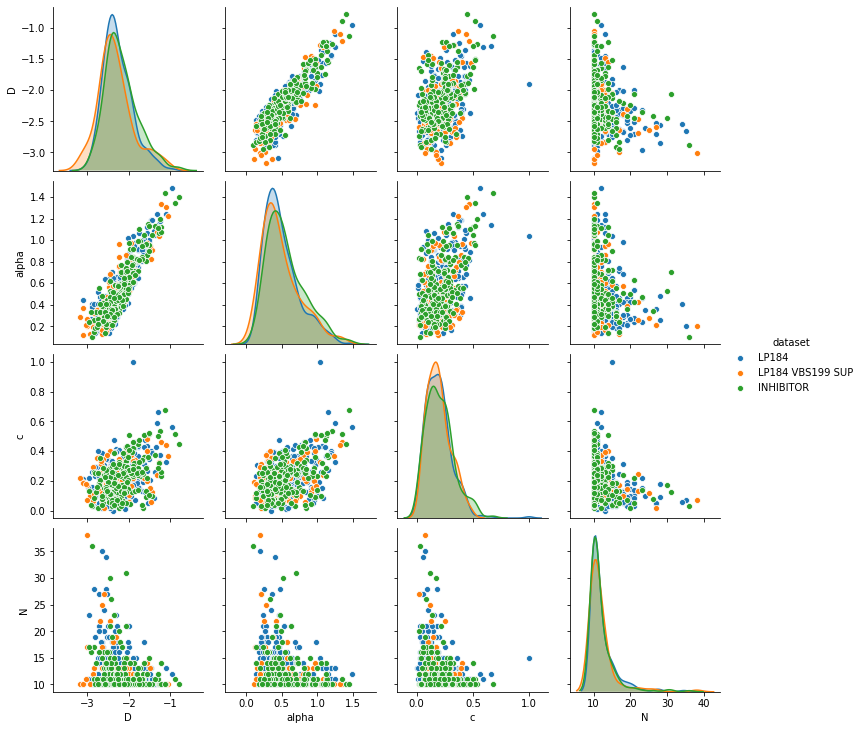

In [4]:
# Concatenate all data
concatenated = pd.concat([samp1.assign(dataset='LP184'), samp2.assign(dataset='LP184 VBS199 SUP'),samp3.assign(dataset='INHIBITOR')])
sns.pairplot(concatenated[['D','alpha','c','N','dataset']][(concatenated['R2']>0.5)],hue='dataset')
plt.show()

#sns.pairplot(df1[['D','alpha','c','I','N']])
#sns.pairplot(df2[['D','alpha','c','I','N']])

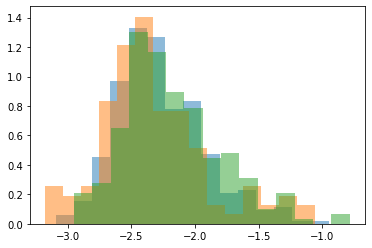

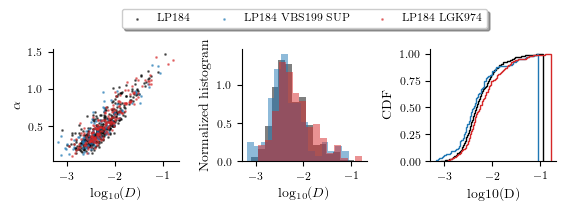

In [5]:
D1 = list(samp1['D'].values)
D2 = list(samp2['D'].values)
D3 = list(samp3['D'].values)
A1 = list(samp1['alpha'].values)
A2 = list(samp2['alpha'].values)
A3 = list(samp3['alpha'].values)
bins=15
plt.hist(D1,density=True,alpha=0.5,bins=bins)
plt.hist(D2,density=True,alpha=0.5,bins=bins)
plt.hist(D3,density=True,alpha=0.5,bins=bins)
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=1))
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.,bottom=0.6)
ax = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[0,2])

size=1
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(D1,A1,color='k',alpha=0.5,s=size,label='LP184')
ax.scatter(D2,A2,color='tab:blue',alpha=0.5,s=size,label='LP184 VBS199 SUP')
ax.scatter(D3,A3,color='tab:red',alpha=0.5,s=size,label='LP184 LGK974')
ax.set_xlabel(r'log$_{10}(D)$')
ax.set_ylabel(r'$\alpha$')
ax.legend(loc='upper center', bbox_to_anchor=(2, 1.4),ncol=3, fancybox=True, shadow=True)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.hist(D1,density=True,alpha=0.5,bins=bins,color='k')
ax2.hist(D2,density=True,alpha=0.5,bins=bins,color='tab:blue')
ax2.hist(D3,density=True,alpha=0.5,bins=bins,color='tab:red')
ax2.set_xlabel(r'log$_{10}(D)$')
ax2.set_ylabel(r'Normalized histogram')

ax3.hist(D1,bins=100,density=True, histtype='step',cumulative=True,color='k')
ax3.hist(D2,bins=100,density=True, histtype='step',cumulative=True,color='tab:blue')
ax3.hist(D3,bins=100,density=True, histtype='step',cumulative=True,color='tab:red')
ax3.set_ylabel('CDF')
ax3.set_xlabel('log10(D)')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.savefig('Results/sidebyside_135nm.pdf',bbox_inches = 'tight')
plt.show()

# CDF analysis

KS statistic =  0.11264923460045412
bootstrap p-value =  0.07


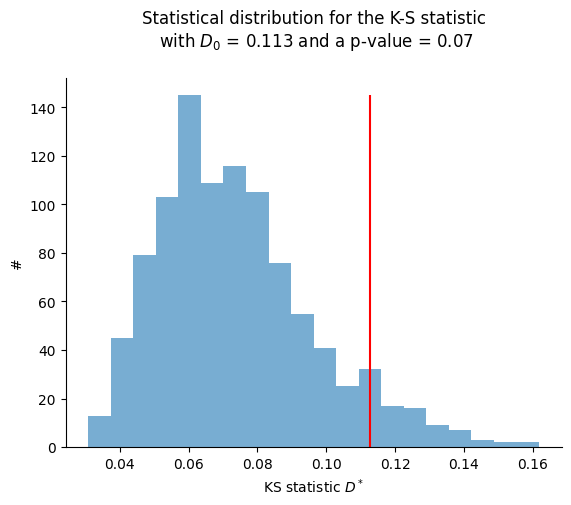

In [6]:
from Functions.functions import kolmogorov_smirnov
mpl.rcParams.update(mpl.rcParamsDefault)
stat,pvalue = kolmogorov_smirnov(D1,D2,plot=True,nloop=1000)

# Large search radius

In [7]:
files1 = ["Data/SM1/tracks425.csv","Data/SM2/tracks425.csv","Data/SM3/tracks425.csv","Data/SM4/tracks425.csv","Data/SM5/tracks425.csv","Data/SM6/tracks425.csv","Data/SM7/tracks425.csv","Data/SM8/tracks425.csv","Data/SM9/tracks425.csv","Data/SM10/tracks425.csv","Data/SM11/tracks425.csv","Data/SM12/tracks425.csv","Data/SM13/tracks425.csv"]
files2 = ["Data/SM1_WNT/tracks425.csv","Data/SM2_WNT/tracks425.csv","Data/SM3_WNT/tracks425.csv","Data/SM4_WNT/tracks425.csv","Data/SM5_WNT/tracks425.csv","Data/SM6_WNT/tracks425.csv","Data/SM7_WNT/tracks425.csv","Data/SM8_WNT/tracks425.csv","Data/SM10_WNT/tracks425.csv","Data/SM11_WNT/tracks425.csv","Data/SM12_WNT/tracks425.csv"]
files3 = ["Data/SM1_INI/tracks425.csv","Data/SM2_INI/tracks425.csv","Data/SM3_INI/tracks425.csv","Data/SM4_INI/tracks425.csv","Data/SM5_INI/tracks425.csv","Data/SM6_INI/tracks425.csv","Data/SM8_INI/tracks425.csv","Data/SM9_INI/tracks425.csv","Data/SM11_INI/tracks425.csv","Data/SM12_INI/tracks425.csv","Data/SM13_INI/tracks425.csv","Data/SM14_INI/tracks425.csv"]

DATA1_425 = pool_data(files1,dt,minframe,maxframe,rsquared_threshold,fit_option=5)
DATA2_425 = pool_data(files2,dt,minframe,maxframe,rsquared_threshold,fit_option=5)
DATA3_425 = pool_data(files3,dt,minframe,maxframe,rsquared_threshold,fit_option=5)

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  10 , maxframe =  40 , R2 threshold =  -1000
Fit option:  5
Reading filenames in  ['Data/SM1/tracks425.csv', 'Data/SM2/tracks425.csv', 'Data/SM3/tracks425.csv', 'Data/SM4/tracks425.csv', 'Data/SM5/tracks425.csv', 'Data/SM6/tracks425.csv', 'Data/SM7/tracks425.csv', 'Data/SM8/tracks425.csv', 'Data/SM9/tracks425.csv', 'Data/SM10/tracks425.csv', 'Data/SM11/tracks425.csv', 'Data/SM12/tracks425.csv', 'Data/SM13/tracks425.csv'] ...
Analysis for Data/SM1/tracks425.csv ...
609  tracks were kept out of  27614 . Done.
Analysis for Data/SM2/tracks425.csv ...
1971  tracks were kept out of  84248 . Done.
Analysis for Data/SM3/tracks425.csv ...
1513  tracks were kept out of  59395 . Done.
Analysis for Data/SM4/tracks425.csv ...
990  tracks were kept out of  42043 . Done.
Analysis for Data/SM5/tracks425.csv ...
31  tracks were kept out of  2757 . Done.
Analysis for Data/SM6/tracks425.csv ...
758  tracks were kept out of  44032 . D

# Here change `minframe` and $R^2$ for the datasets at 425 nm

In [8]:
display(DATA1_425.describe())
display(DATA2_425.describe())
display(DATA3_425.describe())

samp1 = DATA1_425[(DATA1_425['R2']>0.5) & (DATA1_425['N']>=15)]
samp1.reset_index()
samp2 = DATA2_425[(DATA2_425['R2']>0.5) & (DATA2_425['N']>=15)]
samp2.reset_index()
samp3 = DATA3_425[(DATA3_425['R2']>0.5) & (DATA3_425['N']>=15)]
samp3.reset_index()

,alpha,D,c,R2,N
count,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000
mean,0.460420,-1.616575,0.189509,-0.037162,14.620168
std,0.371089,0.681255,0.139062,1.860019,5.603438
min,0.100000,-3.856050,0.000000,-71.064393,10.000000
25%,0.100000,-2.131778,0.079024,-0.202913,11.000000
50%,0.352224,-1.668127,0.155626,0.253132,13.000000
75%,0.720805,-1.116741,0.269643,0.807506,16.000000
max,1.626773,0.000000,0.891527,0.999763,40.000000


,alpha,D,c,R2,N
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.385737,-1.924631,0.163982,-0.121566,14.624072
std,0.347095,0.732118,0.130068,1.600624,5.671768
min,0.100000,-3.634133,0.001071,-24.017615,10.000000
25%,0.100000,-2.511128,0.066613,-0.277157,11.000000
50%,0.243662,-1.983168,0.126031,0.083307,13.000000
75%,0.585629,-1.422268,0.225013,0.703661,16.000000
max,1.828430,0.000000,0.777261,0.999564,40.000000


,alpha,D,c,R2,N
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.566905,-1.410973,0.217154,0.105466,14.054148
std,0.389741,0.683848,0.146679,1.510484,5.109483
min,0.100000,-3.610405,0.002836,-21.925342,10.000000
25%,0.192362,-1.902633,0.098749,-0.097906,11.000000
50%,0.522755,-1.399424,0.186939,0.501154,12.000000
75%,0.871765,-0.892049,0.303112,0.876991,15.000000
max,1.698977,0.000000,0.889957,0.999770,40.000000


,index,alpha,D,c,R2,N,x,y,MSD,Filename,spotIDs
0,4,0.724081,-0.998765,0.115095,0.861864,15,"[57.49100000000001, 57.361000000000004, 57.443...","[41.443000000000005, 41.665, 41.802, 41.556999...","[0.05000271428571466, 0.07695492307692305, 0.0...",Data/SM1_INI/tracks425.csv,"[151027, 152267, 156216, 157449, 158770, 16008..."
1,11,0.951802,-0.823630,0.409642,0.671439,16,"[55.632, 55.585, 55.523, 55.528999999999996, 5...","[43.788999999999994, 43.701, 43.66399999999999...","[0.031180533333333618, 0.07674900000000023, 0....",Data/SM1_INI/tracks425.csv,"[151086, 152316, 156271, 157499, 158821, 16012..."
2,19,0.820461,-0.855957,0.204835,0.767652,19,"[30.854, 30.72, 30.79, 30.671, 30.718000000000...","[8.068999999999999, 8.387, 8.447000000000001, ...","[0.04906116666666654, 0.08086617647058807, 0.1...",Data/SM1_INI/tracks425.csv,"[150327, 151636, 155531, 156808, 158061, 15940..."
3,28,0.912545,-0.800791,0.239469,0.925646,15,"[66.715, 66.44, 66.15100000000001, 66.169, 66....","[6.797999999999999, 6.75, 6.822, 7.081, 7.0379...","[0.042284142857142264, 0.0783268461538453, 0.1...",Data/SM1_INI/tracks425.csv,"[158027, 159361, 160690, 163357, 162017, 16464..."
4,32,0.299562,-1.705747,0.202805,0.631523,19,"[64.346, 64.15100000000001, 64.17399999999999,...","[8.046, 8.117, 8.06, 8.105, 8.136000000000001,...","[0.028812999999999908, 0.04394458823529406, 0....",Data/SM1_INI/tracks425.csv,"[159403, 160729, 163383, 162044, 164667, 16595..."
...,...,...,...,...,...,...,...,...,...,...,...
516,4821,0.369358,-1.728516,0.092251,0.577111,20,"[49.985, 50.031000000000006, 49.94399999999999...","[64.34100000000001, 64.17, 64.327, 64.42399999...","[0.023466947368421046, 0.0339765555555551, 0.0...",Data/SM14_INI/tracks425.csv,"[6945462, 6947129, 6948792, 6950438, 6952059, ..."
517,4827,0.326156,-2.054011,0.078114,0.884266,22,"[53.321999999999996, 53.412, 53.25100000000000...","[51.498999999999995, 51.56100000000001, 51.479...","[0.01388604761904752, 0.014692250000000115, 0....",Data/SM14_INI/tracks425.csv,"[6963451, 6968489, 6970184, 6966849, 6965136, ..."
518,4843,1.033576,-0.777457,0.015781,0.933731,15,"[49.768, 49.857, 50.18600000000001, 50.218, 50...","[64.44, 64.407, 64.42399999999999, 64.345, 64....","[0.029531714285715275, 0.06414784615384668, 0....",Data/SM14_INI/tracks425.csv,"[7036793, 7041679, 7038460, 7040065, 7045058, ..."
519,4850,0.436507,-1.499571,0.138463,0.694311,23,"[53.278999999999996, 53.17100000000001, 52.843...","[51.464, 51.603, 51.675, 51.58, 51.38, 51.508,...","[0.032550863636363996, 0.04971361904761935, 0....",Data/SM14_INI/tracks425.csv,"[7066464, 7068151, 7063211, 7069837, 7064805, ..."


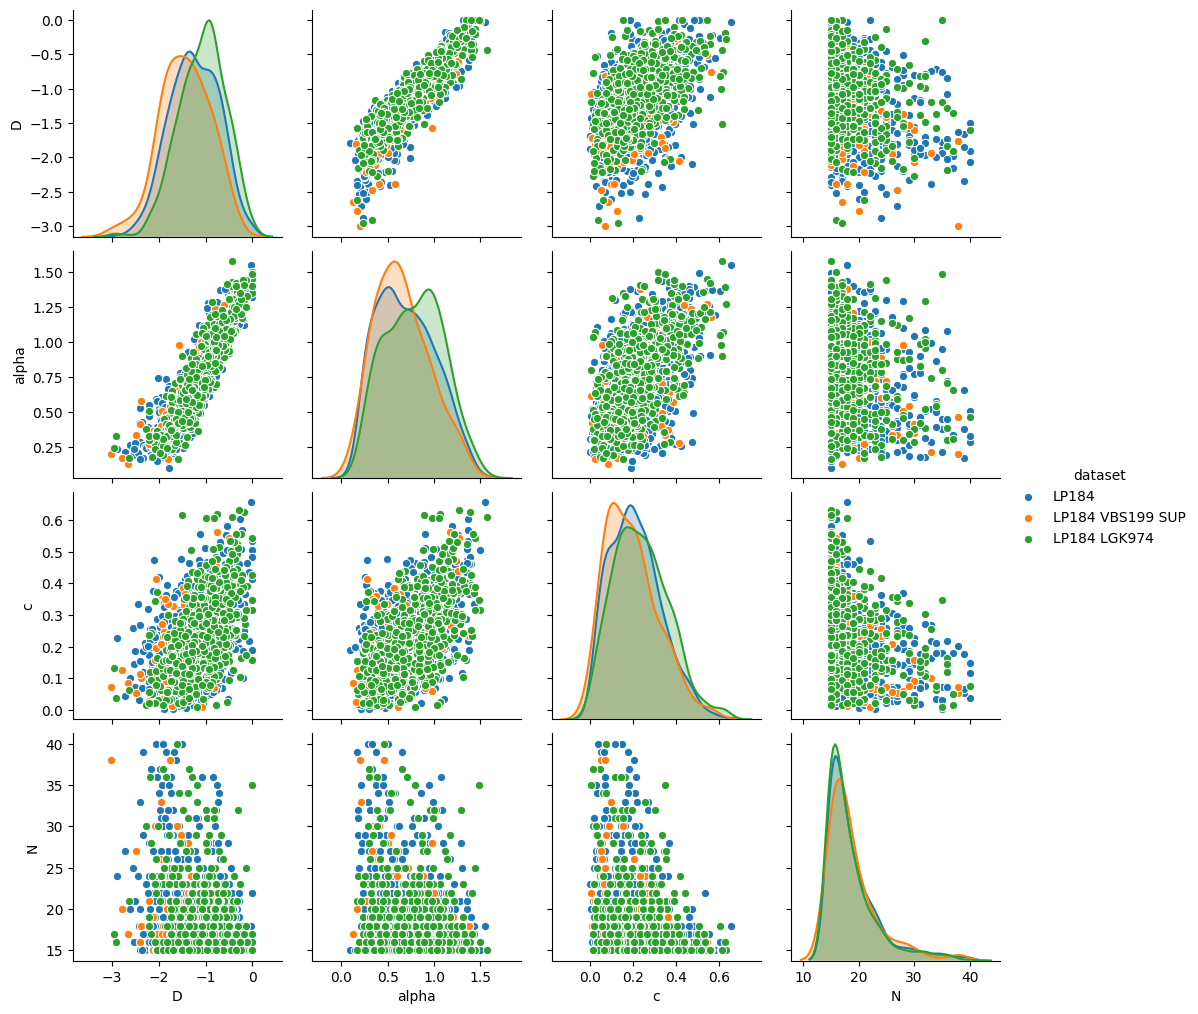

In [9]:
concatenated = pd.concat([samp1.assign(dataset='LP184'), samp2.assign(dataset='LP184 VBS199 SUP'),samp3.assign(dataset='LP184 LGK974')])
sns.pairplot(concatenated[['D','alpha','c','N','dataset']],hue='dataset')
plt.show()

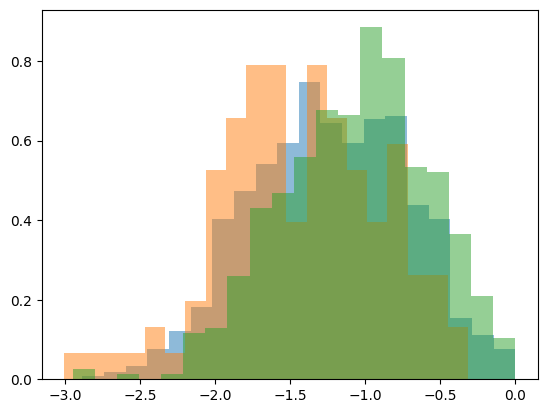

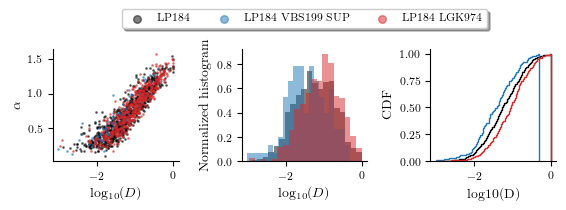

In [10]:
D1 = list(samp1['D'].values)
D2 = list(samp2['D'].values)
D3 = list(samp3['D'].values)
A1 = list(samp1['alpha'].values)
A2 = list(samp2['alpha'].values)
A3 = list(samp3['alpha'].values)
bins=20
plt.hist(D1,density=True,alpha=0.5,bins=bins)
plt.hist(D2,density=True,alpha=0.5,bins=bins)
plt.hist(D3,density=True,alpha=0.5,bins=bins)
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=1))
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.,bottom=0.6)
ax = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[0,2])

size=1
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(D1,A1,color='k',alpha=0.5,s=size,label='LP184')
ax.scatter(D2,A2,color='tab:blue',alpha=0.5,s=size,label='LP184 VBS199 SUP')
ax.scatter(D3,A3,color='tab:red',alpha=0.5,s=size,label='LP184 LGK974')
ax.set_xlabel(r'log$_{10}(D)$')
ax.set_ylabel(r'$\alpha$')
lgnd = ax.legend(loc='upper center', bbox_to_anchor=(2, 1.4),ncol=3, fancybox=True, shadow=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.hist(D1,density=True,alpha=0.5,bins=bins,color='k')
ax2.hist(D2,density=True,alpha=0.5,bins=bins,color='tab:blue')
ax2.hist(D3,density=True,alpha=0.5,bins=bins,color='tab:red')
ax2.set_xlabel(r'log$_{10}(D)$')
ax2.set_ylabel(r'Normalized histogram')

ax3.hist(D1,bins=100,density=True, histtype='step',cumulative=True,color='k')
ax3.hist(D2,bins=100,density=True, histtype='step',cumulative=True,color='tab:blue')
ax3.hist(D3,bins=100,density=True, histtype='step',cumulative=True,color='tab:red')
ax3.set_ylabel('CDF')
ax3.set_xlabel('log10(D)')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.savefig('Results/sidebyside_425nm_nocleaning.pdf',bbox_inches = 'tight')
plt.show()

KS statistic =  0.15415973951532536
bootstrap p-value =  0.0


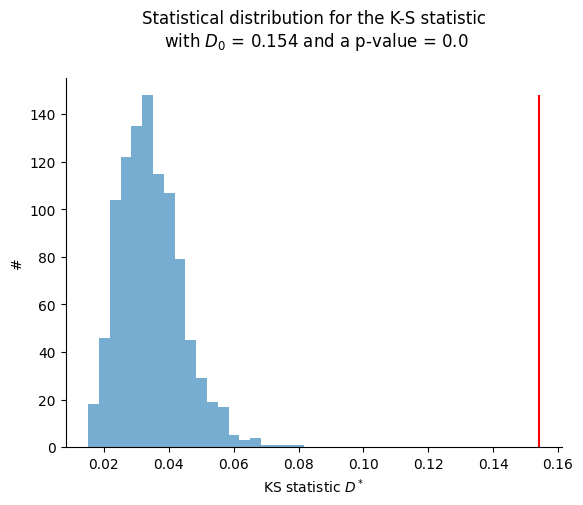

In [11]:
from Functions.functions import kolmogorov_smirnov

mpl.rcParams.update(mpl.rcParamsDefault)
stat,pvalue = kolmogorov_smirnov(D1,D3,plot=True,nloop=1000)

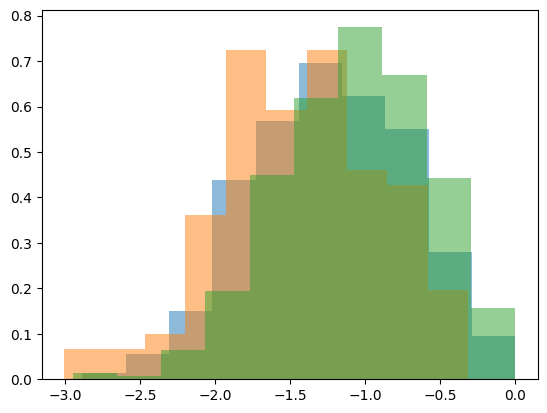

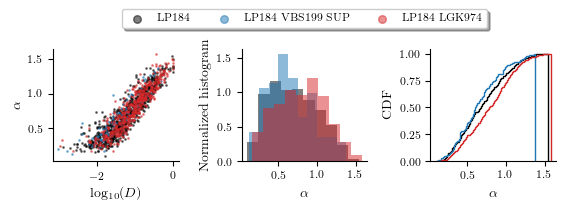

In [12]:
D1 = list(samp1['D'].values)
D2 = list(samp2['D'].values)
D3 = list(samp3['D'].values)
A1 = list(samp1['alpha'].values)
A2 = list(samp2['alpha'].values)
A3 = list(samp3['alpha'].values)
bins=10
plt.hist(D1,density=True,alpha=0.5,bins=bins)
plt.hist(D2,density=True,alpha=0.5,bins=bins)
plt.hist(D3,density=True,alpha=0.5,bins=bins)
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=1))
grid = plt.GridSpec(1, 3, wspace=0.5, hspace=0.,bottom=0.6)
ax = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[0,2])

size=1
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(D1,A1,color='k',alpha=0.5,s=size,label='LP184')
ax.scatter(D2,A2,color='tab:blue',alpha=0.5,s=size,label='LP184 VBS199 SUP')
ax.scatter(D3,A3,color='tab:red',alpha=0.5,s=size,label='LP184 LGK974')
ax.set_xlabel(r'log$_{10}(D)$')
ax.set_ylabel(r'$\alpha$')
lgnd = ax.legend(loc='upper center', bbox_to_anchor=(2, 1.4),ncol=3, fancybox=True, shadow=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]



ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.hist(A1,density=True,alpha=0.5,bins=bins,color='k')
ax2.hist(A2,density=True,alpha=0.5,bins=bins,color='tab:blue')
ax2.hist(A3,density=True,alpha=0.5,bins=bins,color='tab:red')
ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel(r'Normalized histogram')

ax3.hist(A1,bins=100,density=True, histtype='step',cumulative=True,color='k')
ax3.hist(A2,bins=100,density=True, histtype='step',cumulative=True,color='tab:blue')
ax3.hist(A3,bins=100,density=True, histtype='step',cumulative=True,color='tab:red')
ax3.set_ylabel('CDF')
ax3.set_xlabel(r'$\alpha$')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#plt.savefig('Results/sidebyside_425nm_nocleaning.pdf',bbox_inches = 'tight')
plt.show()